In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
football_df=pd.read_csv('data/Football.csv')
football_df

,League,Team,Main Formation,Goals scored,Goals Conceded,Goal Differential,League Placement,Shot on Target,Possesion Time %,Pass completion %,Number of Takeaways,Squad value
0,Premier League,Arsenal,4-3-3,88.0,43.0,45.0,2.0,194.0,60.00,83.2,805.0,1000.00
1,Premier League,Aston Villa,2-4-3-1,51.0,46.0,5.0,7.0,145.0,54.00,79.2,957.0,509.55
2,Premier League,Bournemouth,4-4-2,37.0,71.0,-34.0,15.0,126.0,40.40,76.2,971.0,287.20
3,Premier League,Brentford,3-5-2,58.0,46.0,12.0,9.0,147.0,48.00,72.8,928.0,371.20
4,Premier League,Brighton,4-2-3-1,72.0,53.0,19.0,6.0,219.0,53.70,83.9,919.0,529.83
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Ligue 1,Rennes,4-4-2,69.0,39.0,30.0,4.0,189.0,55.00,83.1,941.0,387.75
98,Ligue 1,Strasbourg,3-5-2,51.0,59.0,-8.0,15.0,150.0,65.00,77.2,1127.0,123.55
99,Ligue 1,Toulouse,4-3-3,51.0,57.0,-6.0,13.0,171.0,48.00,80.0,1125.0,104.80
100,Ligue 1,Troyes,3-4-2-1,45.0,81.0,-36.0,19.0,130.0,42.18,78.7,1006.0,76.30


In [31]:

# Filter based on 'Main Formation' column
base_df = football_df[football_df['Main Formation'] == "3-1-4-2"]
print(base_df)

# Calculate the average of all columns except 'League', 'Team', and 'Unnamed'
average_df = base_df.drop(['League', 'Team', 'Main Formation'], axis=1).mean()

# Print or use the resulting DataFrame
average_df




        League             Team Main Formation  Goals scored  Goals Conceded  \
25  Bundesliga    Werder Bremen        3-1-4-2          51.0            64.0   
41     La Liga  Atletico Madrid        3-1-4-2          70.0            33.0   

    Goal Differential  League Placement  Shot on Target  Possesion Time %  \
25              -13.0              13.0           136.0              48.0   
41               37.0               3.0           195.0              51.0   

    Pass completion %  Number of Takeaways  Squad value   
25               75.2                916.0          89.5  
41               82.1                971.0         534.3  


Goals scored            60.50
Goals Conceded          48.50
Goal Differential       12.00
League Placement         8.00
Shot on Target         165.50
Possesion Time %        49.50
Pass completion %       78.65
Number of Takeaways    943.50
Squad value            311.90
dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


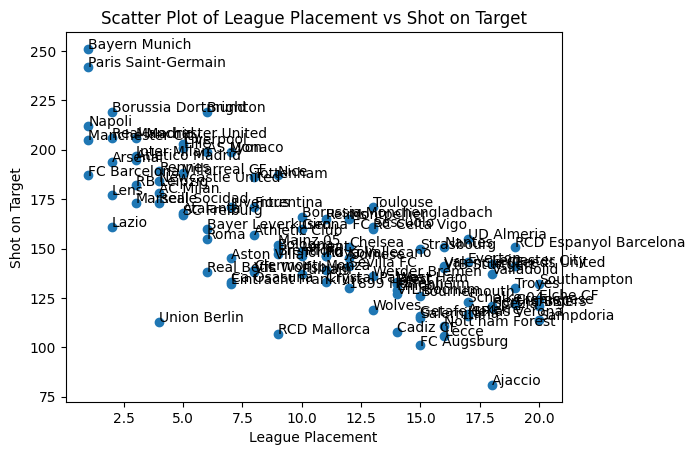

In [9]:
x = football_df['League Placement']
y = football_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(football_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shot on Target')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()

In [10]:
# take the average of the placement to formation 
''''
x = football_df['League Placement']
y = football_df['Main Formation']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(football_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()
'''

"'\nx = football_df['League Placement']\ny = football_df['Main Formation']\n\nplt.scatter(x, y)\n\n# Annotate each point with the team name from Serie_A_df\nfor i, team_name in enumerate(football_df['Team']):\n    plt.text(x.iloc[i], y.iloc[i], team_name)\n\nplt.xlabel('League Placement')\nplt.ylabel('Number of Takeaways')\nplt.title('Scatter Plot of League Placement vs Number of Takeaways')\nplt.show()\n"

In [11]:

x1 = football_df['Goals scored']
x2 = football_df['Goals Conceded']
x3 = football_df['Shot on Target']
x4 = football_df['Pass completion %']
x5= football_df['Number of Takeaways']
x6 = football_df['Possesion Time %']

X = np.array([x1]).T  #<-- reshape to an array of points

w = football_df['League Placement']

# use sklearn tools for regression
regression = LinearRegression()  # create object for the class
regression.fit(X, w)  # perform linear regression
model = regression.predict(X)  # make predictions

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X, w))
#print('residuals \n',w-model)

#print('\n prediction = ',regression.predict([[110,1190,3.5]]))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
Prem_df=football_df[football_df['League'] == 'Premier League']
Prem_df


,League,Team,Main Formation,Goals scored,Goals Conceded,Goal Differential,League Placement,Shot on Target,Possesion Time %,Pass completion %,Number of Takeaways,Squad value
0,Premier League,Arsenal,4-3-3,88.0,43.0,45.0,2.0,194.0,60.0,83.2,805.0,1000.00
1,Premier League,Aston Villa,2-4-3-1,51.0,46.0,5.0,7.0,145.0,54.0,79.2,957.0,509.55
2,Premier League,Bournemouth,4-4-2,37.0,71.0,-34.0,15.0,126.0,40.4,76.2,971.0,287.20
3,Premier League,Brentford,3-5-2,58.0,46.0,12.0,9.0,147.0,48.0,72.8,928.0,371.20
4,Premier League,Brighton,4-2-3-1,72.0,53.0,19.0,6.0,219.0,53.7,83.9,919.0,529.83
5,Premier League,Chelsea,3-4-3,38.0,47.0,-9.0,12.0,151.0,61.0,83.8,1081.0,994.95
6,Premier League,Crystal Palace,4-2-3-1,40.0,49.0,-9.0,11.0,133.0,43.0,77.4,1049.0,323.05
7,Premier League,Everton,4-3-3,34.0,57.0,-23.0,17.0,143.0,40.0,74.7,1098.0,413.15
8,Premier League,Fulham,4-2-3-1,55.0,53.0,2.0,10.0,137.0,49.0,77.6,963.0,295.25
9,Premier League,Leeds United,4-2-3-1,48.0,78.0,-30.0,19.0,141.0,56.4,73.5,1232.0,345.15


In [17]:
Prem_squads_df = Prem_df['Squad value '].mean()
Prem_squads_df


558.589

In [ ]:


x = Prem_df['League Placement']
y = Prem_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Prem_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shot on Target')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()


In [ ]:
x = Prem_df['League Placement']
y = Prem_df['Number of Takeaways']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Prem_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

############# Main Section ############
# loading dataset using pandas
football_df = pd.read_csv('data/Football .csv')

# using seaborn pairplot
sns.pairplot(football_df, hue='League Placement')  # Replace 'your_column_name' with the actual column name you want to use
# to show
plt.show()


In [ ]:
Ligue_1_df=football_df[football_df['League'] == 'Ligue 1']
Ligue_1_df

In [ ]:
x = Ligue_1_df['League Placement']
y = Ligue_1_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Ligue_1_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shot on Target')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()

In [ ]:
x = Ligue_1_df['League Placement']
y = Ligue_1_df['Number of Takeaways']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Ligue_1_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()

In [ ]:
Laliga_df=football_df[football_df['League'] == 'La Liga']
Laliga_df

In [ ]:
x = Laliga_df['League Placement']
y = Laliga_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Laliga_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shot on Target')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()

In [ ]:
x = Laliga_df['League Placement']
y = Laliga_df['Number of Takeaways']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Laliga_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()

In [ ]:
Bundesliga_df=football_df[football_df['League'] == 'Bundesliga']
Bundesliga_df

In [ ]:
x = Bundesliga_df['League Placement']
y = Bundesliga_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Bundesliga_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shot on Target')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()

In [ ]:
x = Bundesliga_df['League Placement']
y = Bundesliga_df['Number of Takeaways']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Bundesliga_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()

In [ ]:
Serie_A_df=football_df[football_df['League'] == 'Serie A']
Serie_A_df

In [ ]:
x = Serie_A_df['League Placement']
y = Serie_A_df['Shot on Target']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Serie_A_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Shots on target')
plt.title('Scatter Plot of League Placement vs Number of Takeaways')
plt.show()

In [ ]:
x = Serie_A_df['League Placement']
y = Serie_A_df['Number of Takeaways']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Serie_A_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('League Placement')
plt.ylabel('Number of Takeaways')
plt.title('Scatter Plot of League Placement vs Shot on Target')
plt.show()

In [ ]:
x = Serie_A_df['Shot on Target']
y = Serie_A_df['Goals scored']

plt.scatter(x, y)

# Annotate each point with the team name from Serie_A_df
for i, team_name in enumerate(Serie_A_df['Team']):
    plt.text(x.iloc[i], y.iloc[i], team_name)

plt.xlabel('Shots on target')
plt.ylabel('Goals scored')
plt.title('Scatter Plot of Shots on Target vs goals scored')
plt.show()